<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset6

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#importing the dataset

D6 = pd.read_csv("Dataset6_ftse.csv", names = ["actual"])
D6.head()

,actual
0,6567.36
1,6597.37
2,6636.16
3,6682.48
4,6677.52


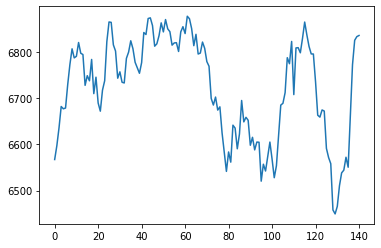

In [ ]:
plt.plot(D6['actual'])

#KPSS Test

In [ ]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D6[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('actual')

Results of KPSS Test for  actual
Test Statistic            0.348183
p-value                   0.099490
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D6 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [ ]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D6[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('actual')

Results of Dickey-Fuller Test for  actual 

Test Statistic                  -2.315797
p-value                          0.166924
#Lags Used                       0.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


>For the given dataset D6 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

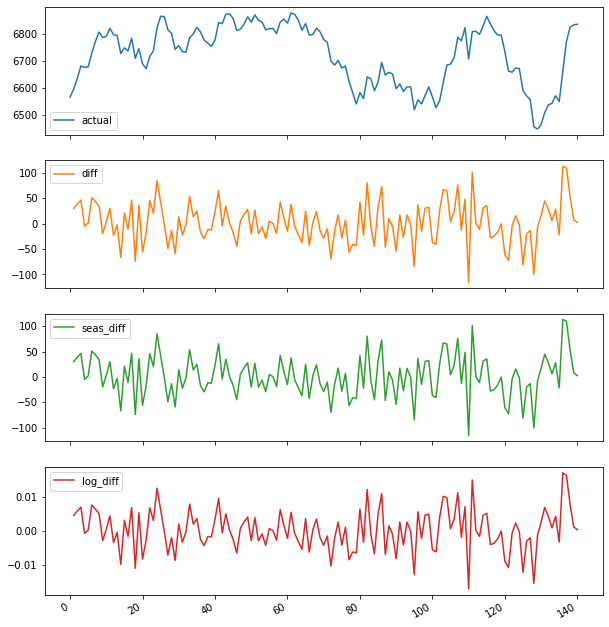

In [ ]:
# Differencing
D6['diff'] = D6['actual'].diff(periods=1)

# Seasonal Differencing
D6['seas_diff'] = D6['actual'].diff(periods=1)

# Transformation (here we use log transformation)
D6_log = np.log(D6['actual'])
D6['log_diff'] = D6_log.diff(periods=1)

D6.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn seas_diff is stationary series




In [ ]:
data = D6['actual']

#Single Exponential Smoothing

In [ ]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [ ]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [ ]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [ ]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [ ]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=1), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=1), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=1), "\n")

MSE for alpha =.4 is   2906.064340601707 

MSE for alpha =.35 is  3266.2178702329225 

MSE for alpha =.65 is  1968.0979635797123 

MSE for alpha =.85 is  1694.5511424506178 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  42.08014846569547 

MAE  is  47.66709943478035 

MAE  is  55.70613492782948 

MAE  is  66.62755101983086 

MAE  is  76.34966732330675 

MAE  is  77.96063040000006 



#Double Exponential Smoothing

In [ ]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [ ]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=1), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=1), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=1), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=1), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=1), "\n")


MSE for alpha =.4,  beta = .2  is  2826.76165435628 

MSE for alpha =.35, beta = .5  is  2647.965408780504 

MSE for alpha =.85, beta = .6  is  1993.2009704343427 

MSE for alpha =.45, beta = .6  is  2401.014867644628 

MSE for alpha =.7,  beta = .55 is  1983.42102386602 

MSE for alpha =.2,  beta = .6  is  4123.417965736125 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  41.31899899615032 

MAE  is  61.678284988153266 

MAE  is  83.44633922894647 

MAE  is  98.03658358308378 

MAE  is  116.14494281207583 

MAE  is  123.15423018340577 



#Triple Exponential Smoothing

In [ ]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  285.01864772700867 

MSE for alpha =.35, beta = .5,  gamma = .3  is  1435.5652449230681 

MSE for alpha =.45, beta = .6,  gamma = .4  is  2467.4129248443837 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  29383.656453669744 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  23551.4406598144 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  49808.793819169085 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  13.176625584369749 

MAE  is  24.034942997223368 

MAE  is  50.15973011851447 

MAE  is  143.63404862798754 

MAE  is  178.1183403949335 

MAE  is  232.92033414026733 



# AR

In [ ]:
#fit model
model=ARIMA(D6['seas_diff'].dropna(), order=(1,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D6['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  140
Model:                     ARMA(1, 0)   Log Likelihood                -716.404
Method:                       css-mle   S.D. of innovations             40.376
Date:                Mon, 01 Mar 2021   AIC                           1438.809
Time:                        06:03:08   BIC                           1447.634
Sample:                             0   HQIC                          1442.395
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9332      3.564      0.542      0.588      -5.051       8.918
ar.L1.seas_diff     0.0427      0.084      0.507      0.613      -0.122       0.208
                                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D6['seas_diff'],D6['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 1630.2125287479487


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D6['seas_diff'],D6['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 31.427818172567342


# MA

In [ ]:
#fit model
model=ARIMA(D6['seas_diff'].dropna(), order=(0,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D6['forecast2'] = model_fit.predict()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  140
Model:                     ARMA(0, 1)   Log Likelihood                -716.430
Method:                       css-mle   S.D. of innovations             40.383
Date:                Mon, 01 Mar 2021   AIC                           1438.860
Time:                        06:03:08   BIC                           1447.685
Sample:                             0   HQIC                          1442.446
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9309      3.529      0.547      0.585      -4.986       8.847
ma.L1.seas_diff     0.0342      0.075      0.454      0.651      -0.113       0.182
                                

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D6['seas_diff'],D6['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 1630.8136433184552


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D6['seas_diff'],D6['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 31.41832675771912


# ARIMA

In [ ]:
#fit model
model=ARIMA(D6['actual'].dropna(), order=(1,1,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D6['forecast3'] = model_fit.predict()

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D6['seas_diff'],D6['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D6['seas_diff'],D6['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


# Optimal model check

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
model = pm.auto_arima(D6.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

so best optimal model is ARIMA

# table

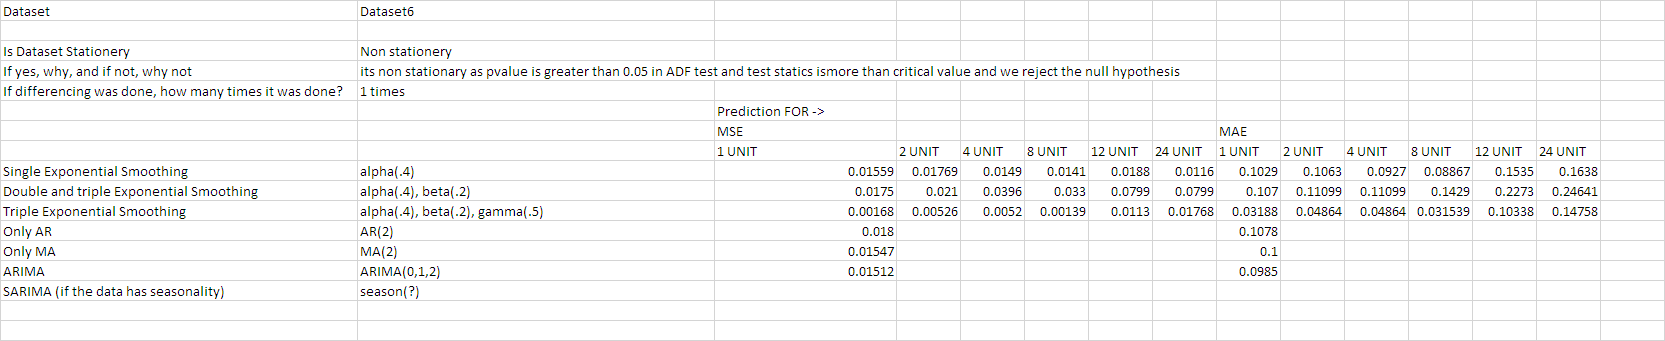